![title](BDPAlogo.png)

# Visualizing Income by Race using R
## BDPA Confernce 2018 

The "tidyverse" is a group of R packages for data science. In this Jupyter Notebook we will be using 5 packages from the tidyverse. We will use the readr package to read in data into Jupyter Notebook, the dplyr package to shape the data, the scale package to format our numbers, the tidyr package for the drop_na() function, and the ggplot2 package to create the visualizations.

In [3]:
library(tidyverse)
library(scales)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.5
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



The code below reads in the data that will be used throughout the notebook into R dataframes. The income_data dataset contains a row that has NA's. NA's represents data points where the value was not available. I removed rows with "NA" using the drop_na() function from tidyr.

In [4]:
setwd("C:/Users/rwade/OneDrive - Diesel Analytics/Talks/BDPA/Code/TestCode/")
income_data <- 
    read_csv("./Data/income_data.csv") %>%
    drop_na()
tidy_income_distribution <- read_csv("./Data/tidy_income_distribution.csv")

Parsed with column specification:
cols(
  Race = col_character(),
  Date = col_date(format = ""),
  Year = col_double(),
  Population = col_double(),
  `Mean Income` = col_integer(),
  `Median Income` = col_integer()
)
Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Year = col_double(),
  RangeID = col_integer(),
  RaceID = col_integer(),
  Race = col_character(),
  Range = col_character(),
  Percent = col_double()
)


The record that was removed above via the drop_na() function can be obtained by running the code below

In [5]:
    read_csv("./Data/income_data.csv") %>%
    filter_all(any_vars(is.na(.)))

Parsed with column specification:
cols(
  Race = col_character(),
  Date = col_date(format = ""),
  Year = col_double(),
  Population = col_double(),
  `Mean Income` = col_integer(),
  `Median Income` = col_integer()
)


Race,Date,Year,Population,Mean Income,Median Income
ASIAN ALONE,1987-01-01,1987,NA,NA,65154


The code below creates a named character vector that is used to define the color for each race. We define the colors using the hex values that represents the color we want. You can get a list of hex values for various colors at http://cloford.com/resources/colours/500col.htm 

In [6]:
group <- c("WHITE ALONE", "BLACK ALONE", "ASIAN ALONE", "HISPANIC", "ALL RACES")
hex_values <- c("#f9e79f", "#17202a", "#FFFF00", "#b7950b", "#FF0000")
names(hex_values) <- group

The code below creates a line plot using the income_data data set and ggplot to show mean income by race. Note how the black income experience has been relative to other races.

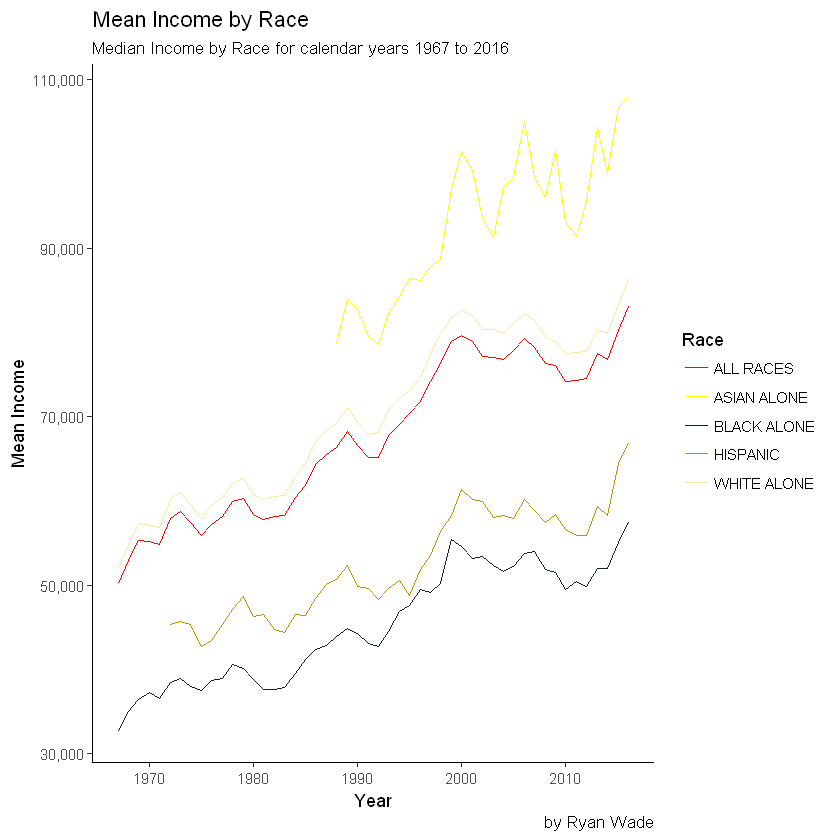

In [7]:
p <- ggplot(income_data, aes(x = Year, y = `Mean Income`, color = Race)) +
    geom_line() +
    scale_color_manual(values = hex_values) +
    scale_y_continuous(labels = comma) +
    theme_classic() +
    labs(
        title = "Mean Income by Race",
        subtitle = "Median Income by Race for calendar years 1967 to 2016",
        caption = "by Ryan Wade"
    )
p


The next chart we will create is a line chart that shows median income by race. Unlike the previous chart, this chart will have a dynamic elements that are calculated at runtime. The code below creates dynamic annotations in the chart. The annotations we show the terminal median income value for each race.

In [8]:
x_cord <- max(income_data$Year)
black_y_cord <-
    income_data %>%
    filter(Race == "BLACK ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(`Median Income`) %>%
    as.numeric()

asian_y_cord <-
    income_data %>%
    filter(Race == "ASIAN ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(`Median Income`) %>%
    as.numeric()

white_y_cord <-
    income_data %>%
    filter(Race == "WHITE ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(`Median Income`) %>%
    as.numeric()

hispanic_y_cord <-
    income_data %>%
    filter(Race == "HISPANIC") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(`Median Income`) %>%
    as.numeric()

all_y_cord <-
    income_data %>%
    filter(Race == "ALL RACES") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(`Median Income`) %>%
    as.numeric()

black_annotation <- dollar(black_y_cord)
asian_annotation <- dollar(asian_y_cord)
white_annotation <- dollar(white_y_cord)
hispanic_annotation <- dollar(hispanic_y_cord)
all_annotation <- dollar(all_y_cord)

Below is a line graph of median income by race that have dynamic annotations that plots the median income by race for the last year in the data set. 

The black median income experience is very similar to the black mean income experience. Every year of the study we were **dead last** compared to the other races.

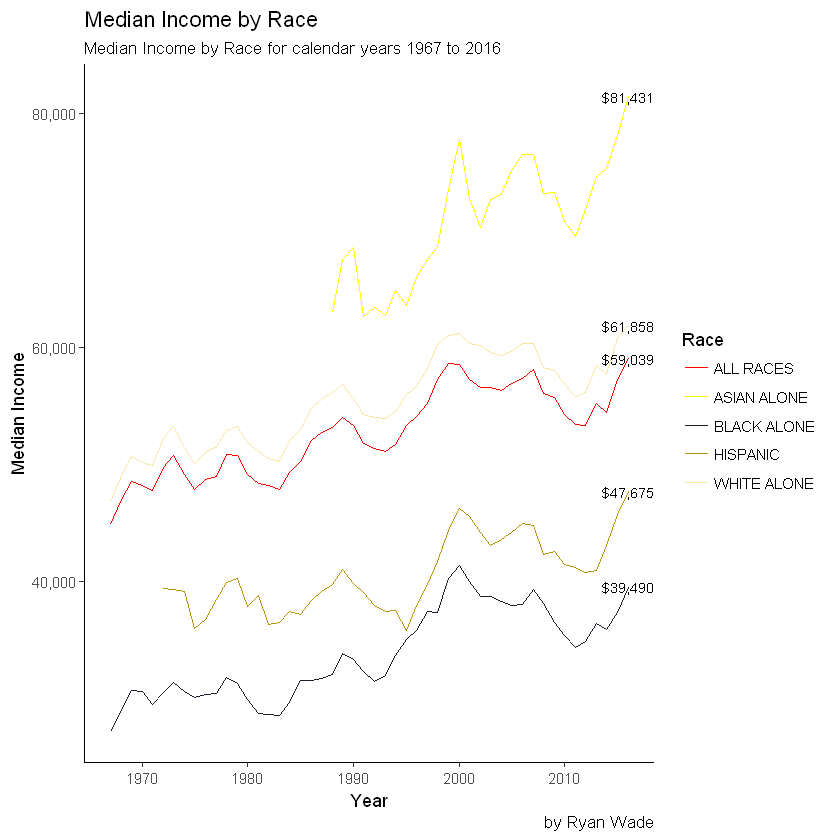

In [9]:
p <- ggplot(income_data, aes(x = Year, y = `Median Income`, color = Race)) +
     geom_line() +
     scale_color_manual(values = hex_values) +
     scale_y_continuous(labels = comma) +
     theme_classic() +
     annotate("text", x = x_cord, y = black_y_cord, label = black_annotation, size = 3) +
     annotate("text", x = x_cord, y = asian_y_cord, label = asian_annotation, size = 3) +
     annotate("text", x = x_cord, y = white_y_cord, label = white_annotation, size = 3) +
     annotate("text", x = x_cord, y = hispanic_y_cord, label = hispanic_annotation, size = 3) +
     annotate("text", x = x_cord, y = all_y_cord, label = all_annotation, size = 3) +
     labs(
         title = "Median Income by Race",
         subtitle = "Median Income by Race for calendar years 1967 to 2016",
         caption = "by Ryan Wade"
     )
p

In the code below I am using the dplyr package to reshape the data for a facet chart that we will soon create. One of the most powerful features of dplyr is a feature called **piping**. Piping is done using **"%>%"** and it enables you to take the results of a function and pass it as the first parameter to another function. This makes your code much more readable.

In [10]:
ID_100Ksplit <-
    tidy_income_distribution %>%
    mutate(
        Race = factor(
                    Race,
                    levels = c("BLACK ALONE", "HISPANIC", "WHITE ALONE", "ASIAN ALONE"),
                    exclude = "ALL RACES"
               ),
        `Income Category` = ifelse(RangeID < 6, "Less than 100K", "Greater than 100K")
    ) %>%
    group_by(Race, Year, `Income Category`) %>%
    summarize(Value = sum(Percent)) %>%
    filter(Year >= 2001 & Race != "ALL RACES")

Below is an example of a facet chart. Facets charts are very powerful because they enable you to create a visualization that is broken out by a variable. In the facet chart below the variable is year.

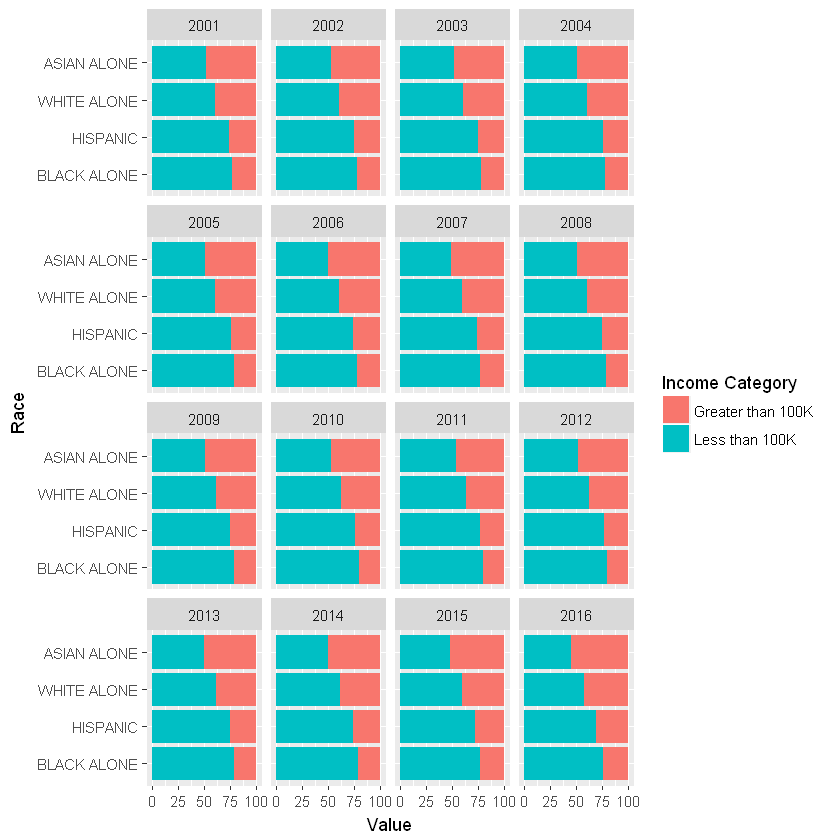

In [11]:
p <- ggplot(ID_100Ksplit, aes(x = Race, y = Value, fill = `Income Category`)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    facet_wrap(~Year)
p

Below we are creating a data set that is similiar to the one used in the chart above. The differnce is that we moved the cutoff point up to 150K. We will use the data to create another facet chart but this one will be contain a dynamic title that describes information about the chart.

In [12]:
ID_150Ksplit <-
    tidy_income_distribution %>%
    mutate(
        Race = factor(
                    Race,
                    levels = c("BLACK ALONE", "HISPANIC", "WHITE ALONE", "ASIAN ALONE"),
                    exclude = "ALL RACES"
               ),
        `Income Category` = ifelse(RangeID < 8, "Less than 150K", "Greater than 150K")
    ) %>%
    group_by(Race, Year, `Income Category`) %>%
    summarize(Value = sum(Percent)) %>%
    filter(Year >= 2001 & Race != "ALL RACES")


The dynamic title that will be used in the next chart will be created using the code below. The code creates a dynamic title that compares Asians to Blacks.

In [13]:
MaxYear <- max(ID_150Ksplit$Year)

Asians <-
    ID_150Ksplit %>%
    ungroup(Race, Year, `Income Category`) %>%
    filter(Race == "ASIAN ALONE", Year == 2016, `Income Category` == "Greater than 150K") %>%
    select(Value) %>%
    as.numeric() / 100

Blacks <-
    ID_150Ksplit %>%
    ungroup(Race, Year, `Income Category`) %>%
    filter(Race == "BLACK ALONE", Year == 2016, `Income Category` == "Greater than 150K") %>%
    select(Value) %>%
    as.numeric() / 100 

charttitle <- "Percent House-Holds Greater Than $150K"
chartsubtitle =
    str_wrap(
        paste(
            paste0("In ",MaxYear,","), 
            "only",
            percent(Blacks), 
            "of black house-holds had an income greater than $150K but in that year",
            percent(Asians), 
            "of Asian families had incomes greater than $150K.",
            sep = " "
        )
    )

The code below creates a facet chart that compares income mix by race. Note how much lower the % of black households are compared to the other races, especially the Asians!

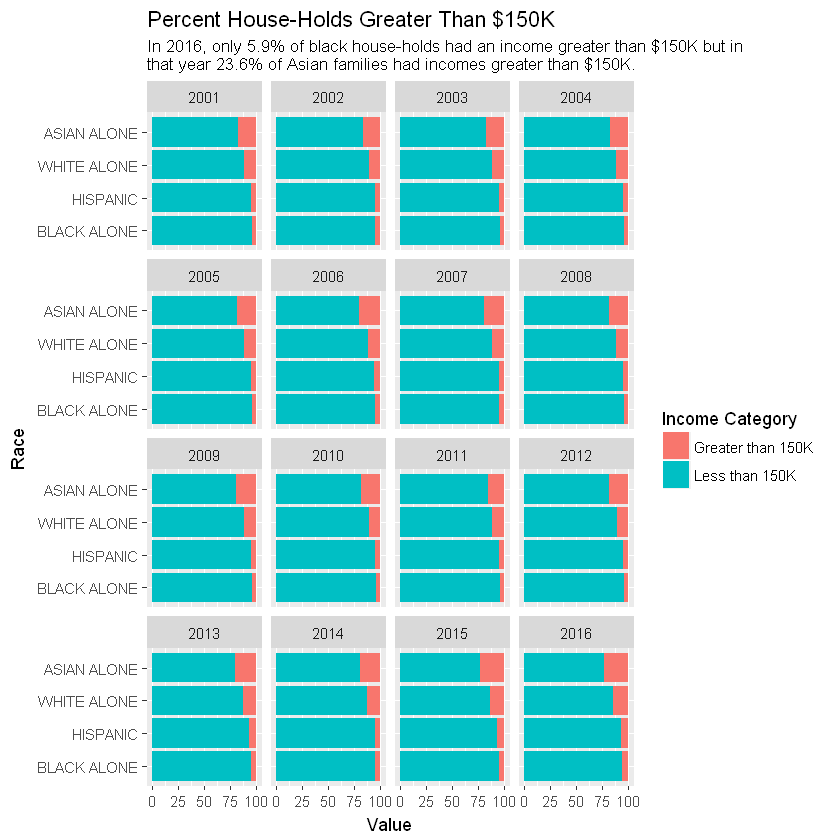

In [14]:
p <- ggplot(ID_150Ksplit, aes(x = Race, y = Value, fill = `Income Category`)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    facet_wrap(~Year) +
    labs(title = charttitle, subtitle = chartsubtitle)
p

So far in all of the charts that we developed blacks were dead last in every category. Let's analyze the poor and see if blacks are number one in that category. We filter out data on the poor from the tidy_income_distribution data set. In this case we are defining poor as families that makes less than $15K.

In [15]:
The_Poor <-
    tidy_income_distribution %>%
    filter(Race != "ALL RACES" & RangeID == 1) %>%
    select(Race, Year, Percent)


The chart will contain a dynamic title that will be created using the code below.

In [16]:
x_cord <- max(The_Poor$Year)

black_poor <-
    The_Poor %>%
    filter(Race == "BLACK ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(Percent) %>%
    as.numeric()

white_poor <-
    The_Poor %>%
    filter(Race == "WHITE ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(Percent) %>%
    as.numeric()

asian_poor <-
    The_Poor %>%
    filter(Race == "ASIAN ALONE") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(Percent) %>%
    as.numeric()

hispanic_poor <-
    The_Poor %>%
    filter(Race == "HISPANIC") %>%
    arrange(desc(Year)) %>%
    top_n(1, Year) %>%
    select(Percent) %>%
    as.numeric()

compared_to_whites <- percent(black_poor/white_poor)
compared_to_asians <- percent(black_poor/asian_poor)
compared_to_hispanics <- percent(black_poor/hispanic_poor)
chart_subtitle <-
    str_wrap(
        paste(
            "The poor by race for calendar years 1967 to 2016.",
            "In 2016, the percentage of blacks that are in the poor category is",
            compared_to_hispanics,
            "higher than it is for hispanics,",
            compared_to_whites,
            "higher than it is for whites, and",
            compared_to_asians,
            "highter than it is for asians."
        )
    )

Finally we are number one is something from an economic standpoint. SMH. The Asians and Whites were fighting for last place but looks like the Asians won the fight at the end.

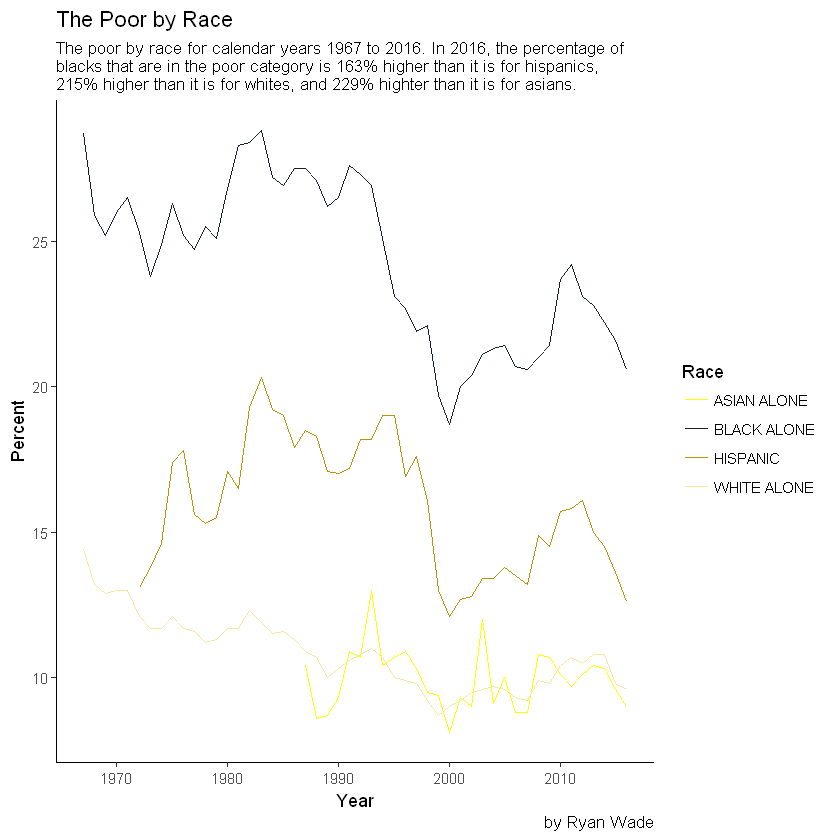

In [17]:
p <- ggplot(The_Poor, aes(x = Year, y = Percent, color = Race)) +
     geom_line() +
     scale_color_manual(values = hex_values) +
     theme_classic() +
     labs(
         title = "The Poor by Race",
         subtitle = chart_subtitle,
         caption = "by Ryan Wade"
     )
p